<a href="https://colab.research.google.com/github/pbelouin/imprs_workshop/blob/main/IMPRS_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPRS WORKSHOP: Working with texts

The goal of this 3 hours session is to introduce you to a number of tools allowing you to perform simple text preparation and analysis tasks, which you can apply to your own corpus.

## Setting the Scene
We need to install some libraries we will use to perform NLP on our corpus. Some of these libraries come "pre-packaged" with Google Colab, but below is the procedure to install additional libraries.


In [ ]:
#NLTK for ngrams
!pip install nltk
# NER with Spacy
!pip install spacy

## Loading our Text
Next, we need to load the documents we will be analysing into a python "list". First, we need to upload the folder containing our documents to colab. Then, we need some code to load each document into a variable, and add each variable to our list.


In [ ]:
file_1 = open('/content/2015.txt', 'r')
text_1 = file_1.read()
file_1.close()

file_2 = open('/content/2016.txt', 'r')
text_2 = file_2.read()
file_2.close()


file_3 = open('/content/2017.txt', 'r')
text_3 = file_3.read()
file_3.close()


file_4 = open('/content/2018.txt', 'r')
text_4 = file_4.read()
file_4.close()

file_5 = open('/content/2019.txt', 'r')
text_5 = file_5.read()
file_5.close()

file_6 = open('/content/2020.txt', 'r')
text_6 = file_6.read()
file_6.close()

file_7 = open('/content/2022.txt', 'r')
text_7 = file_7.read()
file_7.close()

text_7

'Visual Analysis of Printed Illustrations using Computer Vision\nBergel, Giles Edward; Dutta, Abhishek  27\nNavigating and Processing Data from the TEI with XSLT\nBeshero-Bondar, Elisa Eileen; Scholger, Martina; Nagasaki, Kiyonori  28\nEquity, Diversity and Inclusion for Digital Humanists\nBordalejo, Barbara; O\'Donnell, Daniel; Woods, Nathan . 30\nIntroduction to DraCor – Programmable Corpora for Digital Drama Analysis\nBoerner, Ingo; Fischer, Frank; Milling, Carsten; Trilcke, Peer; Sluyter-Gäthje, Henny  32\nWriting a multilayered article for the Journal of Digital History\nClavert, Frédéric; Elisar, Ori; Pfeiffer, Mirjam; Guerard, Elisabeth  35\nTutorial on Fuzzy String Matching with DeezyMatch\nColl Ardanuy, Mariona; Hosseini, Kasra; Nanni, Federico; Vitale, Valeria . 37\nBiographical Data in a Digital World 2022 (BD 2022) Workshop\nDaza, Angel; Fokkens, Antske; Hadden, Richard; Hyvönen, Eero; Koho, Mikko; Wandl-Vogt, Eveline  39\nWorkshop: HathiTrust Research Center’s Extracted Fe

each of the interview texts was loaded in a variable, called "text_nmb". To make things easier, we are going to put all these into a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), which will contain our texts. 

In [ ]:
corpus = {'2015': text_1, 
          '2016': text_2, 
          '2017': text_3, 
          '2018': text_4, 
          '2019': text_5, 
          '2020': text_6,
          '2021': text_7}

We can check the size of our list by calling the [len() function](https://www.w3schools.com/python/ref_func_len.asp):

In [ ]:
len(corpus)

7

we can then access each text by its index in the dictionary. Try it out: Try to access the '2016', or the '2018' one by changing the index value in the cell below:

In [ ]:
corpus['2015']

'Deux Projets D\'Édition Numérique Dans Le Cadre Du Projet SyMoGIH: Le Journal De Léonard Michon Et Les Actes Des Synodes Des Églises Réformées De Bourgogne\nVisualizing Mouvance: Towards an Alignment of Medieval Vernacular Text Traditions\nMapping Languages Performance by Performance\nA Study of Knowledge Integration in Digital Humanities Based on Bibliographic Analysis\nVerbal Identity of a Fictional Character: a Quantitative Study with a Machine Learning Experiment\nCombining Corpora and Statistics using Geographical Technologies: New Evidence on Nineteenth Century Infant Mortality Decline in England and Wales\nDigging into ECCO: Identifying Commonplaces and other Forms of Text Reuse at Scale\nRead, Play, Build: Teaching Sherlock Holmes through Digital Humanities\nChange, Transition and Governance: Lessons from a Long-Term, Large Scale DH Collaboration\nModelling Music Reception: An Ontology For Representing Interpretations of Richard Wagner\'s Leitmotifs\nAuthorship Attribution of 

Congratulations! We now have loaded the data we want to analyse into Python. Now, we can start working on it.

## Data Cleaning

To turn our text into data that can be processed by an NLP algorithm, we need to remove punctuation and remove stop words. To do this, we can use regular expressions, string replacement, and the stopword functions provided by nltk to perform these operations, which we put in a function so that we can apply it to any text we want

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_and_tokenize(text):

  #remove line breaks
  text = text.replace('\n', ' ')

  #removing punctiation using a regular expression
  text = re.sub("[^-9A-Za-z ]", "" , text)
  text = text.lower()

  #tokenize
  tokens = nltk.tokenize.word_tokenize(text)
  tokens

  #removing stop words
  stopwords = nltk.corpus.stopwords.words('english')
  new_stopwords = ["the", "la", "to", "de","las"]
  stopwords.extend(new_stopwords)

  clean_tokens = [i for i in tokens if i not in stopwords]
  return clean_tokens

## Ngrams, Ngram Frequencies and Visualisation



We need a number of functions from the _nltk_ library, which will allow us to create ngrams from our tokens, and look at their distribution in our texts.

In [ ]:
from nltk import ngrams, FreqDist, bigrams

In [ ]:
all_text = " ".join(corpus.values())
clean_tokens = clean_and_tokenize(all_text)
clean_ngrams = ngrams(clean_tokens,2)

In [ ]:
ngram_fd = FreqDist(clean_ngrams).most_common(20)
ngram_fd

We will use a visualisation library called _matplotlib_ to visualize the frequency of ngrams in our texts.

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 20 artists>

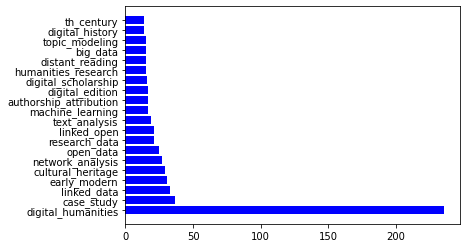

In [ ]:
# join the words with '_' in the middle
wrds = ['_'.join(x) for x, c in ngram_fd]

# get the counts
wdth = [c for x, c in ngram_fd]

plt.barh(wrds, wdth, color='blue')


In [ ]:
def show_top_20_ngrams(year, number_of_tokens):
  clean_tokens = clean_and_tokenize(corpus[year])
  clean_ngrams = ngrams(clean_tokens,number_of_tokens)
  ngram_fd = FreqDist(clean_ngrams).most_common(20)
  wrds = ['_'.join(x) for x, c in ngram_fd]
  wdth = [c for x, c in ngram_fd]
  plt.barh(wrds, wdth, color='blue')
  plt.title(year)

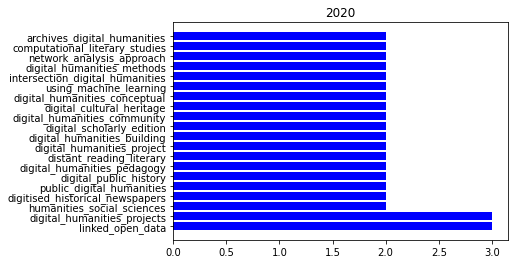

In [ ]:
show_top_20_ngrams('2020',3)

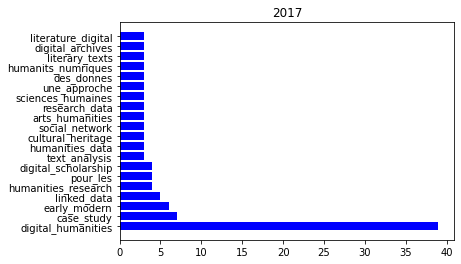

In [ ]:
show_top_20_ngrams('2017',2)

##Word Embeddings

To perform word embeddings, we're going to use another library called _gensim_.

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk import sent_tokenize, word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
  #stop words
  stopwords = nltk.corpus.stopwords.words('english')
  new_stopwords = ["the", "la", "to", "de","las", "an"]
  stopwords.extend(new_stopwords)

In [ ]:
# we will work on the whole text at once, and extract the sentences from it.
all_text = " ".join(corpus.values())
data = []
 
# iterate through each sentence in the file
for i in sent_tokenize(all_text):
    temp = []
     
    # tokenize the sentence into words. We discard stop words and punctuation.
    for j in word_tokenize(i):
      j = j.lower()
      if (j not in stopwords) and j.isalpha():
        temp.append(j)
 
    data.append(temp)
data[0]

In [ ]:
# Create CBOW model
model = gensim.models.Word2Vec(data, min_count = 1, window = 10, batch_words = 10)

In [ ]:
model.wv.most_similar('dh', topn=5)

[('digital', 0.5794291496276855),
 ('literary', 0.5117015242576599),
 ('text', 0.5066954493522644),
 ('using', 0.5066516399383545),
 ('texts', 0.50092613697052)]

## Name Entity Recognition
NER is a process through which a chunk of text is parsed through to find entities that can be put under categories such as people, organizations, locations, etc. 

We need a pre-trained model (in english), which will perform the NER for us. We could also train our own model, but in this case we borrow this model from Spacy.

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
from spacy import displacy
doc = nlp(corpus['2018'])
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})